<a href="https://colab.research.google.com/github/hzhang0110/hzhang_ML_Projects/blob/main/makemore_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt #for charts


In [298]:
#read all words
words = open('/content/drive/MyDrive/machine_learning_files/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [299]:
len(words)

32033

In [300]:
#build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)
print(itos)


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [301]:
#build the dataset

block_size = 3
X,Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)


In [302]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [303]:
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [304]:
C = torch.randn((27,2))
C

tensor([[-0.7577, -0.0776],
        [-1.6664, -0.3446],
        [ 0.3964,  0.0500],
        [ 0.1160,  0.3633],
        [ 0.8447, -0.4445],
        [ 0.6051,  0.6664],
        [-1.0627, -1.6362],
        [ 1.4136,  0.7254],
        [ 0.9719, -2.3917],
        [ 1.4050, -0.3011],
        [-0.6354,  0.5886],
        [-1.3680, -1.1171],
        [ 1.0244,  0.3242],
        [-0.7243,  0.7447],
        [ 1.1582,  2.2711],
        [ 0.6815, -1.0633],
        [ 0.4605, -0.1675],
        [ 0.2622, -0.0231],
        [-0.0036,  0.3460],
        [ 0.7771, -0.2878],
        [-1.5505, -0.7628],
        [ 0.1015,  0.8012],
        [-1.3672, -0.7495],
        [-0.6756, -0.4915],
        [-0.1284,  1.9605],
        [ 0.2647, -0.6386],
        [-0.8789,  0.1171]])

In [305]:
C[X].shape, C[X]

(torch.Size([228146, 3, 2]),
 tensor([[[-0.7577, -0.0776],
          [-0.7577, -0.0776],
          [-0.7577, -0.0776]],
 
         [[-0.7577, -0.0776],
          [-0.7577, -0.0776],
          [ 0.6051,  0.6664]],
 
         [[-0.7577, -0.0776],
          [ 0.6051,  0.6664],
          [-0.7243,  0.7447]],
 
         ...,
 
         [[-0.8789,  0.1171],
          [-0.8789,  0.1171],
          [ 0.2647, -0.6386]],
 
         [[-0.8789,  0.1171],
          [ 0.2647, -0.6386],
          [-0.8789,  0.1171]],
 
         [[ 0.2647, -0.6386],
          [-0.8789,  0.1171],
          [-0.1284,  1.9605]]]))

In [306]:
emb = C[X]
emb

tensor([[[-0.7577, -0.0776],
         [-0.7577, -0.0776],
         [-0.7577, -0.0776]],

        [[-0.7577, -0.0776],
         [-0.7577, -0.0776],
         [ 0.6051,  0.6664]],

        [[-0.7577, -0.0776],
         [ 0.6051,  0.6664],
         [-0.7243,  0.7447]],

        ...,

        [[-0.8789,  0.1171],
         [-0.8789,  0.1171],
         [ 0.2647, -0.6386]],

        [[-0.8789,  0.1171],
         [ 0.2647, -0.6386],
         [-0.8789,  0.1171]],

        [[ 0.2647, -0.6386],
         [-0.8789,  0.1171],
         [-0.1284,  1.9605]]])

In [307]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [308]:
W1.shape, b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [309]:
h = torch.tanh(emb.view(-1,6) @ W1 +b1)
h.shape

torch.Size([228146, 100])

In [310]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)


In [311]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [312]:
counts = logits.exp()

In [313]:
prob = counts/counts.sum(1,keepdim=True)

In [314]:
prob.shape

torch.Size([228146, 27])

In [315]:
prob

tensor([[4.0149e-08, 9.1185e-11, 4.3476e-06,  ..., 1.8988e-04, 1.3830e-09,
         1.1279e-05],
        [2.7383e-02, 2.5880e-16, 2.6844e-03,  ..., 8.8153e-07, 2.0242e-08,
         2.5673e-02],
        [1.9345e-11, 1.0585e-07, 1.2722e-12,  ..., 9.8571e-01, 1.6784e-13,
         7.3160e-09],
        ...,
        [2.0963e-01, 1.2893e-13, 1.0585e-04,  ..., 9.5960e-06, 1.1384e-07,
         1.4736e-05],
        [4.2800e-06, 1.8152e-09, 4.2217e-11,  ..., 2.1221e-02, 4.2291e-08,
         1.0381e-03],
        [5.4487e-09, 3.2522e-14, 1.6139e-06,  ..., 2.8700e-09, 3.3262e-11,
         1.3454e-08]])

In [316]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [317]:
#rewrite everything to make it reuseable

In [318]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [319]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [320]:
sum(p.nelement() for p in parameters) #number of parameters

3481

In [321]:
for p in parameters:
  p.requires_grad = True

In [322]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [323]:
lri = []
lossi = []
for i in range(1000):

  #minibatch construct
  ix = torch.randint(0,X.shape[0],(32,)) #batch size = 32
  #forward path
  emb = C[X[ix]] #(32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
  logits = h @ W2 + b2 #(32,27)
  #counts = logits.exp()
  #prob = counts / counts.sum(1, keepdim= True)
  #loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Y[ix]) #Using cross_entropy is preferred.
  #print(loss.item()) #these are the loss in just 1 mini batch

  #backward path
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  lr = lrs[i]
  #lr = 10**-1
  for p in parameters:
    p.data += -lr * p.grad #learning rate = 0.1

  #track stats
  lri.append(lre[i])
  lossi.append(loss.item())


### **Plot the loss by learn rate. The optimal learning rate is around 0.1**

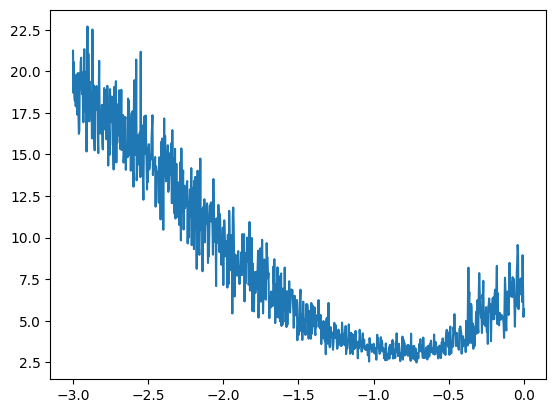

In [324]:
plt.plot(lri,lossi)

In [325]:
#evaluate the loss in all records
emb = C[X] #([228146, 3, 2])
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #([228146, 100])
logits = h @ W2 + b2 #(228146, 27)
loss = F.cross_entropy(logits,Y)
loss

tensor(6.3970, grad_fn=<NllLossBackward0>)

In [326]:
#training split, dev/validation split, test split
#80%, 10%, 10%


# Next, add train test split, and re-build the code

In [327]:
# build the dataset

def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [328]:
len(words), n1, n2

(32033, 25626, 28829)

In [329]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [400]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [401]:
sum(p.nelement() for p in parameters) #number of parameters

11897

In [402]:
for p in parameters:
  p.requires_grad = True

In [403]:
lri = []
lossi = []
stepi = []

In [404]:


for i in range(200000):

  #minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,)) #batch size = 32
  #forward path
  emb = C[Xtr[ix]] #(32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,100)
  logits = h @ W2 + b2 #(32,27)
  #counts = logits.exp()
  #prob = counts / counts.sum(1, keepdim= True)
  #loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix]) #Using cross_entropy is preferred.
  #print(loss.item()) #these are the loss in just 1 mini batch

  #backward path
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad #learning rate = 0.1

  #track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

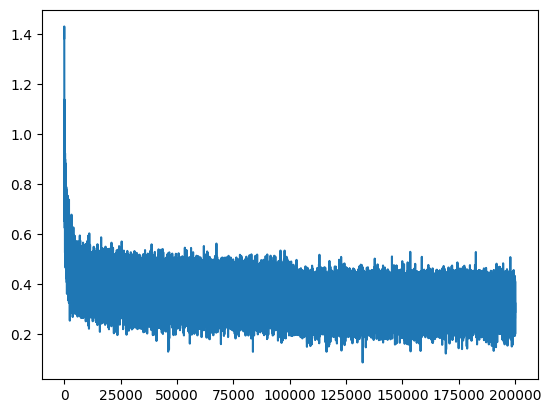

In [405]:
plt.plot(stepi, lossi)

In [406]:
print(loss.item())

1.9397225379943848


In [407]:
#evaluate the loss in training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #([228146, 100])
logits = h @ W2 + b2 #(228146, 27)
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.1292, grad_fn=<NllLossBackward0>)

In [408]:
#evaluate the loss in all records
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #([228146, 100])
logits = h @ W2 + b2 #(228146, 27)
loss = F.cross_entropy(logits,Ydev)
loss
#similar loss between train and dev

tensor(2.1710, grad_fn=<NllLossBackward0>)

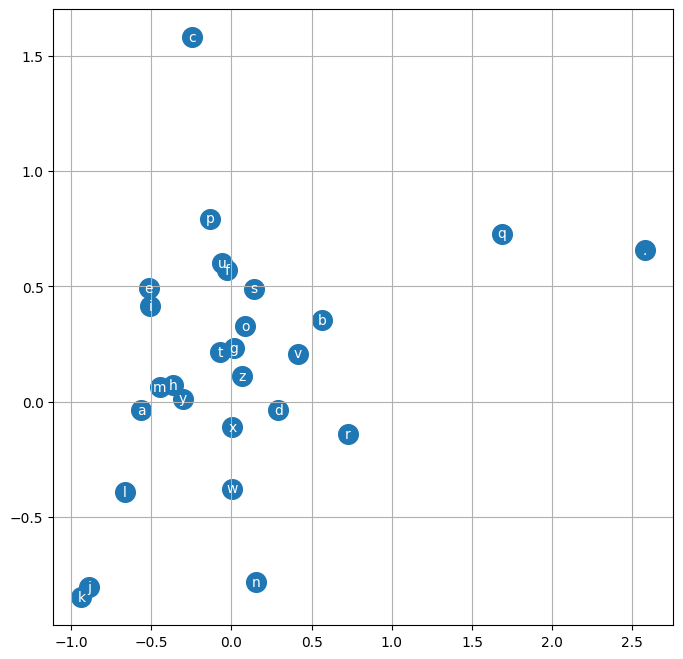

In [409]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [411]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(100):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mona.
mayanniellend.
ryah.
remmastendraeg.
adelynneliigh.
poren.
eden.
estanar.
kayzimontelin.
shubergahiriel.
kendrenleigh.
berlyn.
brey.
dariyah.
fael.
yuma.
maston.
azhia.
aadyansun.
zakelver.
ell.
revin.
jaoxien.
adi.
fen.
oeobhigpeilah.
cathya.
hurar.
min.
airi.
evon.
walla.
ortaristtand.
sira.
alingtton.
saivia.
mellaketan.
ayleanna.
damarienna.
alin.
aud.
aive.
dah.
vicle.
ajasepango.
alorictaviiah.
glon.
ellaynn.
lory.
pory.
nog.
amauri.
maryk.
ames.
thavia.
daelen.
ama.
coper.
tyreste.
emona.
mika.
beimhta.
mos.
gorgin.
had.
kamar.
aco.
kath.
azren.
ana.
kenna.
aunce.
aosy.
saias.
nic.
ciretanciand.
emila.
ana.
lakaan.
avian.
gulianna.
loi.
zyon.
darai.
june.
trayline.
jamiir.
tomerrie.
meriad.
adya.
anlee.
zevan.
galdinco.
taja.
andis.
beckseri.
janna.
taxel.
day.
jaxsi.
